In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

<img src='others\binho_checkstate.png' width = 500px/>

In [16]:
def create_w_state_3qubit(qc: qiskit.QuantumCircuit, theta: float = np.pi/2):
    """Create GHZ state with a parameter

    Args:
        - qc (QuantumCircuit): Init circuit
        - theta (Float): Parameter
    
    Returns:
        - QuantumCircuit: the added circuit
    """
    if isinstance(theta, float) != True:
        theta = (theta['theta'])
    qc.ry(theta, 0)
    qc.ch(0, 1)
    qc.cnot(1, 2)
    qc.cnot(0, 1)
    qc.x(0)
    return qc
def create_w_state_3qubit_inverse(qc: qiskit.QuantumCircuit, theta: float = np.pi/2):
    """Create GHZ state with a parameter

    Args:
        - qc (QuantumCircuit): Init circuit
        - theta (Float): Parameter
    
    Returns:
        - QuantumCircuit: the added circuit
    """
    if isinstance(theta, float) != True:
        theta = (theta['theta'])
    qc.x(0)
    qc.cnot(0, 1)
    qc.cnot(1, 2)
    qc.ch(0, 1)
    qc.ry(-theta, 0) 
    return qc
    
def create_check_arbitrary_wstate(qc, thetas, num_layers, theta):
    if isinstance(num_layers, int) != True:
        num_layers = num_layers['num_layers']
    if isinstance(theta, float) != True:
        theta = theta['theta']
    # |psi_gen> = U_gen|000...> 
    qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, thetas, num_layers = num_layers)
    qc.barrier()
    # U_target^t|psi_gen> with U_target is GHZ state
    qc = create_w_state_3qubit_inverse(qc, theta)
    return qc

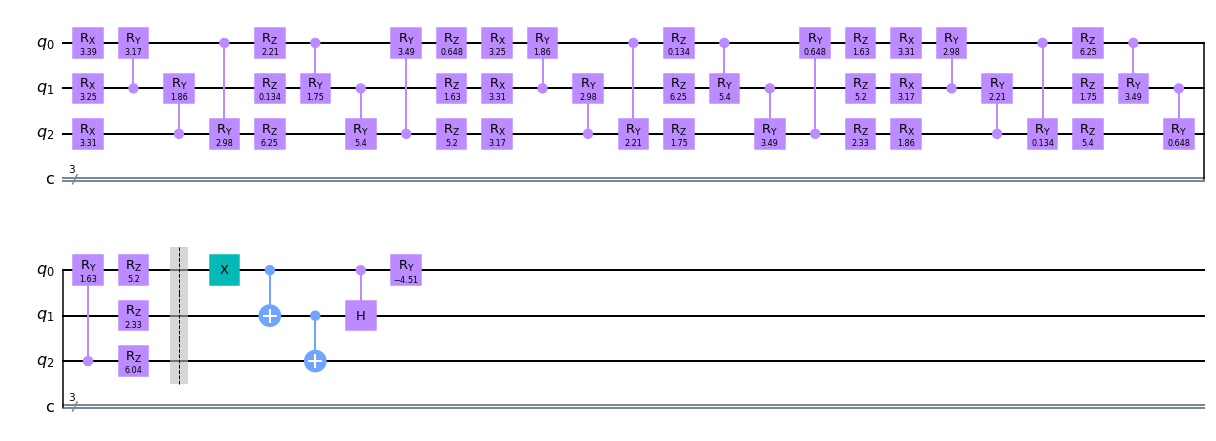

In [17]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*15)
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)
qc = qiskit.QuantumCircuit(3,3)
theta = np.random.uniform(0, 2*np.pi)
qc = create_check_arbitrary_wstate(qc, thetas, num_layers, theta)
qc.draw(output='mpl')

In [18]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*15)
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = create_check_arbitrary_wstate, 
    grad_func = qtm.base_qtm.grad_l,
    loss_func = qtm.base_qtm.loss_basis,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 100/100 [10:57<00:00,  6.57s/it]


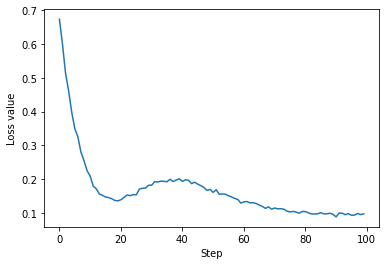

In [19]:
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [20]:
# Get |psi> = U_gen|000...>
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, thetas, num_layers = num_layers)
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
# Get |psi~> = U_target|000...>
qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc1 = create_w_state_3qubit(qc1, theta = theta)
psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.3093920071173073
Fidelity:  (0.9042765865366944-3.738239197359494e-10j)


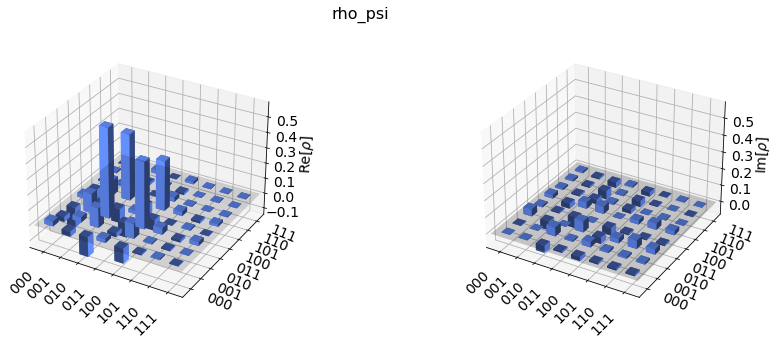

In [21]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

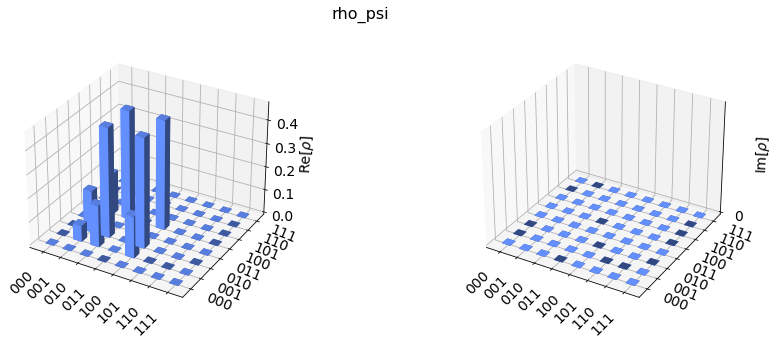

In [22]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi')